# **Análise da Intencionalidade de Desistência do curso de SI na EST/UEA**

## **Objetivos**

**Geral**

Analisar os fatores que influenciam a intencionalidade de desistência dos alunos matriculados no curso de Sistemas de Informação na Escola Superior de Tecnologia.

**Específicos**


1.   Identificar as principais motivações para a desistência dos alunos no curso de Sistemas de Informação.
2.   Investigar o período do curso de Sistemas de Informação com maior incidência de intenção de desistência.
3. Analisar a proporção de alunos ativos que apresentaram ou apresentam intenção de desistência.

In [ ]:
import pandas as pd
import statistics as st
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando o banco de dados da amostra

bd_si='https://docs.google.com/spreadsheets/d/e/2PACX-1vRlzgUtqwnN5gGZACf0c13i-hZ8FtQG2dGTkPKUmpu4VrD1pAhjgeJ2i_o4FAxmnGxp-mo5G3zxOwiC/pub?gid=1981056840&single=true&output=csv'

pd.read_csv(bd_si)


,Idade,Genero,Ano_Ingresso,Periodo_Atual,Intencao,Periodo_Intencao,Ano_Intencao,Desafios_Academicos_Institucionais,Motivacao_Oportunidades,Fatores_Pessoais_Sociais,Trocar_de_Curso,Trocar_de_Instituicao_(MesmoCurso),Trancar_Matrícula,Parar_Frequentar _Universidade,Desligamento_Curso,Agrupamento_Idades,Agrupamento_Ano_Ingresso,Agrupamento_Periodos_Vigentes,Agrupamento_Fase_Intencao,Agrupamento_Anos _Intencao
0,21,Feminino,2023,3º Período,Sim,1º Período,2023.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,21-23,2022-2024,Início do Curso,Início do Curso,2022-2024
1,18,Feminino,2022,5º Período,Sim,3º Período,2023.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,18-20,2022-2024,Metade do Curso,Início do Curso,2022-2024
2,25,Feminino,2022,5º Período,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,Masculino,2023,3º Período,Sim,3º Período,2024.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,18-20,2022-2024,Início do Curso,Início do Curso,2022-2024
4,23,Masculino,2020,Estou desperiodizado,Sim,3º Período,2023.0,1.0,3.0,5.0,1.0,0.0,1.0,1.0,1.0,21-23,2019-2021,Desperiodizados(as),Início do Curso,2022-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,20,Masculino,2022,5º Período,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,25,Feminino,2022,5º Período,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,24,Masculino,2018,Estou desperiodizado,Sim,5º Período,2022.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,24-26,2014-2018,Desperiodizados(as),Metade do Curso,2022-2024
97,20,Feminino,2021,Estou desperiodizado,Sim,3º Período,2022.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18-20,2019-2021,Desperiodizados(as),Início do Curso,2022-2024


In [ ]:
url = bd_si
df = pd.read_csv(url)

## **Metodologia**

a) (Vale 1,0 ponto) :
*   Apresentação do cálculo do tamanho da amostra;
*   Método de amostragem utilizado para compor a amostra.


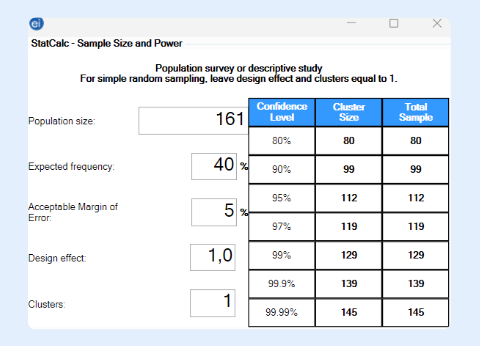

In [ ]:
import math

def calcular_tamanho_amostra_proporcao(Z, p, E, pop):
    n = (Z**2 * p * (1 - p) * pop) / ((pop - 1) * E**2 + Z**2 * p * (1 - p))
    return int(n)  # Remove a parte decimal e retorna apenas a parte inteira

# Exemplo de uso:
Z = 1.645  # Para um nível de confiança de 90%
p = 0.4    # Proporção estimada na população (40%)
E = 0.05   # Margem de erro desejada (5%)
pop = 161  # Tamanho da população

tamanho_amostra = calcular_tamanho_amostra_proporcao(Z, p, E, pop)
print(f'Tamanho da amostra necessário: {tamanho_amostra}')

Tamanho da amostra necessário: 99


### Análises Estatísticas das Variáveis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Variáveis quantitativas contínuas (ajustar conforme necessário)
quantitativas_continuas = ['Idade', 'Ano_Ingresso', 'Ano_Intencao']

# Variáveis qualitativas nominais
qualitativas_nominais = [
    'Genero', 'Intencao', 'Desafios_Academicos_Institucionais',
    'Motivacao_Oportunidades', 'Fatores_Pessoais_Sociais',
    'Trocar_de_Curso', 'Trocar_de_Instituicao_(MesmoCurso)',
    'Trancar_Matrícula', 'Parar_Frequentar_Universidade', 'Desligamento_Curso'
]

# Variáveis qualitativas ordinais
qualitativas_ordinais = ['Periodo_Atual', 'Periodo_Intencao']

In [ ]:
# Análise descritiva para variáveis quantitativas contínuas
for col in quantitativas_continuas:
    if col in df.columns:
        print(f'Análise descritiva para {col}:')
        desc = df[col].describe()

        # Formatação dos valores
        moda = df[col].mode()[0]
        variancia = df[col].var()
        desvio_padrao = df[col].std()
        coef_variacao = desvio_padrao / df[col].mean()

        # Impressão formatada em português
        print(f'Média: {desc["mean"]:.2f}')
        print(f'Mediana: {desc["50%"]:.2f}')
        print(f'Moda: {moda}')
        print(f'Mínimo: {desc["min"]:.0f}')
        print(f'25º percentil: {desc["25%"]:.0f}')
        print(f'75º percentil: {desc["75%"]:.0f}')
        print(f'Máximo: {desc["max"]:.0f}')
        print(f'Variância: {variancia:.2f}')
        print(f'Desvio-padrão: {desvio_padrao:.2f}')
        print(f'Coeficiente de variação: {coef_variacao:.2%}')
        print('\n')
    else:
        print(f'Coluna {col} não encontrada no DataFrame.\n')

# Análise descritiva para variáveis qualitativas nominais
for col in qualitativas_nominais:
    if col in df.columns:
        print(f'Tabela de frequência para {col}:')
        freq = df[col].value_counts()
        print(freq.to_string())
        print('\n')
    else:
        print(f'Coluna {col} não encontrada no DataFrame.\n')

# Análise descritiva para variáveis qualitativas ordinais
for col in qualitativas_ordinais:
    if col in df.columns:
        print(f'Tabela de frequência para {col}:')
        freq = df[col].value_counts()
        print(freq.to_string())
        print('\n')
    else:
        print(f'Coluna {col} não encontrada no DataFrame.\n')


In [ ]:
# Gráficos para variáveis quantitativas contínuas
for col in quantitativas_continuas:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribuição de {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()
        print("\n")  # Adiciona uma linha de espaço entre os gráficos

# Gráficos para variáveis qualitativas nominais
for col in qualitativas_nominais:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col])
        plt.title(f'Tabela de frequência de {col}')
        plt.show()
        print("\n")  # Adiciona uma linha de espaço entre os gráficos

# Gráficos para variáveis qualitativas ordinais
for col in qualitativas_ordinais:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col])
        plt.title(f'Tabela de frequência de {col}')
        plt.show()
        print("\n")  # Adiciona uma linha de espaço entre os gráficos

## **Resultados e discussão**

b) (Vale 1,0 ponto):
*   Tabela de classe (com frequência absoluta simples, relativa, acumulada e ponto médio);
*   Histograma/polígono de no mínimo uma variável quantitativa.


In [ ]:
# Tabela de classes
classes = [16, 18, 20, 22, 24, 26,]
rotulos = ['16-|18', '18-|20', '20-|22', '22-|24', '24-|26',]
classes = pd.cut(x=df.Idade, bins=classes, labels=rotulos)
df['Classe'] = classes
df.head()


Freq = df.Classe.value_counts()
Percentual = round(df.Classe.value_counts(sort=False,normalize=True)*100,1)
Pto = [17, 19, 21, 23, 25, ]
tabela_Renda = pd.DataFrame({'Frequência':Freq,'Percentual':Percentual, 'Ponto Medio':Pto})
tabela_Renda.rename_axis('Idade',axis='columns',inplace=True)
tabela_Renda

Idade,Frequência,Percentual,Ponto Medio
Classe,,,
16-|18,9,9.5,17
18-|20,45,47.4,19
20-|22,21,22.1,21
22-|24,13,13.7,23
24-|26,7,7.4,25


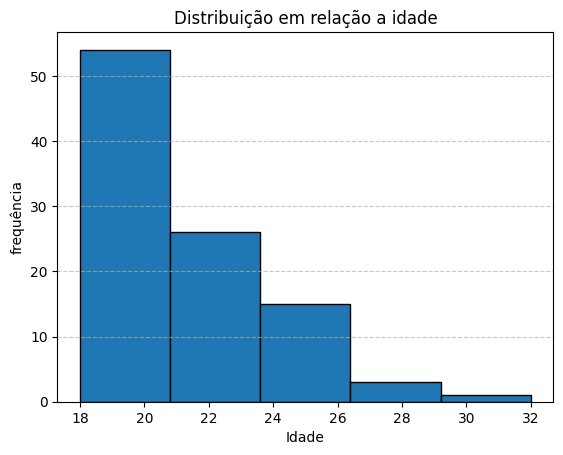

In [ ]:
# Carregar os dados
url = bd_si
df = pd.read_csv(url)
# Histograma
plt.hist(df.Idade, bins=5, edgecolor='black')
plt.title('Distribuição em relação a idade')
plt.xlabel('Idade')
plt.ylabel('frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

c) (Vale 1,0 ponto):


*   Tabelas simples (com frequência absoluta simples e relativa);
*   Respectivo gráfico (barras, colunas ou setores) respeitando o tipo de variável qualitativa ordinal ou nominal.


In [ ]:
# Tabela simples completa para variável qualitativa
Freq = df.Genero.value_counts()
Percentual = round(df.Genero.value_counts(normalize=True)*100,1)
Tabela_genero = pd.DataFrame({'Frequência':Freq,'Percentual':Percentual})
Tabela_genero.rename_axis('Gênero',axis='columns',inplace=True)
Tabela_genero

Gênero,Frequência,Percentual
Genero,,
Masculino,77,77.8
Feminino,19,19.2
Outro,3,3.0


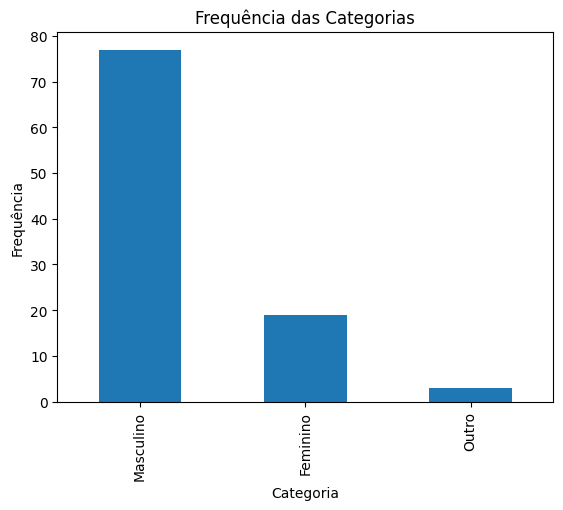

In [ ]:
contagem = df['Genero'].value_counts()

# Gerando o gráfico de barras
contagem.plot(kind='bar')

# Adicionando título e rótulos
plt.title('Frequência das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

d) (Vale 1,0 ponto):

Tabelas de dupla entrada (com as respectivas probabilidades /frequência relativas).


In [ ]:
tabela_absoluta = pd.crosstab(df.Intencao, df.Genero)

# Calculando a tabela de frequências relativas
tabela_relativa = tabela_absoluta.div(tabela_absoluta.sum().sum())

# Juntando as tabelas em uma única tabela
tabela_combinada = tabela_absoluta.astype(str) + " (" + (tabela_relativa * 100).round(2).astype(str) + "%)"

# Exibindo a tabela combinada
tabela_combinada

Genero,Feminino,Masculino,Outro
Intencao,,,
Não,8 (8.08%),42 (42.42%),2 (2.02%)
Sim,11 (11.11%),35 (35.35%),1 (1.01%)


e) (Vale 1,0 ponto):

Apresentação por meio de tabela da média, mediana, moda, variância, desvio-padrão e coeficiente de variação para as variáveis quantitativas especificando qual medida de tendência central deve ser utilizada conforme a simetria ou normalidade dos dados.


In [71]:
import pandas as pd
import statistics as st

# Medidas Estatísticas
def cv(n):
    return round(st.stdev(n) / st.mean(n) * 100, 2)

def estatisticas(x):
    x = [value for value in x if pd.notna(value)]
    stats = {
        "Amostra": len(x),
        "Soma": sum(x),
        "Mínimo": min(x),
        "Máximo": max(x),
        "Média": round(st.mean(x), 2),
        "Mediana": st.median(x),
        "Moda": st.mode(x),
        "Variância amostral": round(st.variance(x), 2),
        "Desvio-padrão amostral": round(st.stdev(x), 2),
        "Coeficiente de variação (%)": round(cv(x), 2)
    }
    return stats

def imprimir_tabela(estatisticas_dict):
    # Imprime o cabeçalho da tabela
    print(f"{'Estatística':<25} {'Valor':<15}")
    print("=" * 40)  # Linha de separação

    # Imprime cada linha da tabela
    for chave, valor in estatisticas_dict.items():
        print(f"{chave:<25} {str(valor):<15}")  # Ajusta a formatação conforme necessário

In [72]:
print("Estatísticas para a variável Idade:")
dados = df.Idade
tabela_estatisticas = estatisticas(dados)
imprimir_tabela(tabela_estatisticas)
print()

Estatísticas para a variável Idade:
Estatística               Valor          
Amostra                   99             
Soma                      2076           
Mínimo                    18             
Máximo                    32             
Média                     20.97          
Mediana                   20             
Moda                      19             
Variância amostral        7.03           
Desvio-padrão amostral    2.65           
Coeficiente de variação (%) 12.64          



In [74]:
print("Estatísticas para a variável Ano de Ingresso:")
dados2 = df.Ano_Ingresso
tabela_estatisticas2 = estatisticas(dados2)
imprimir_tabela(tabela_estatisticas2)
print()

Estatísticas para a variável Ano de Ingresso:
Estatística               Valor          
Amostra                   99             
Soma                      200137         
Mínimo                    2014           
Máximo                    2024           
Média                     2021.59        
Mediana                   2022           
Moda                      2023           
Variância amostral        4.02           
Desvio-padrão amostral    2.01           
Coeficiente de variação (%) 0.1            



In [75]:
print("Estatísticas para a variável Ano de Possível Desistência:")
dados3 = df.Ano_Intencao
tabela_estatisticas3 = estatisticas(dados3)
imprimir_tabela(tabela_estatisticas3)

Estatísticas para a variável Ano de Possível Desistência:
Estatística               Valor          
Amostra                   47             
Soma                      95064.0        
Mínimo                    2018.0         
Máximo                    2024.0         
Média                     2022.64        
Mediana                   2023.0         
Moda                      2023.0         
Variância amostral        1.93           
Desvio-padrão amostral    1.39           
Coeficiente de variação (%) 0.07           


f) (Vale 1,0 ponto):
- Cálculo do Intervalo de Confiança para no mínimo uma variável quantitativa;
- Cálculo do Intervalo de Confiança para no mínimo uma variável qualitativa.  


In [ ]:
import statsmodels.api as sm

# Intervalo de Confiança para Proporção
# inf, sup = sm.stats.proportion_confint(x, n, alpha=0.05, method='normal')
print("n =", len(df.Intencao))
print(df.Intencao.value_counts())
print(df.Intencao.value_counts(normalize=True) * 100)
inf, sup = sm.stats.proportion_confint(len(df[df.Intencao == "Sim"]), len(df.Intencao), alpha=0.05, method='normal')
print("e =", round((sup - inf) / 2 * 100, 2), "%")
print("IC95% (", round(inf * 100, 1), ";", round(sup * 100, 1), ")")


n = 99
Intencao
Não    52
Sim    47
Name: count, dtype: int64
Intencao
Não    52.525253
Sim    47.474747
Name: proportion, dtype: float64
e = 9.84 %
IC95% ( 37.6 ; 57.3 )


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Exemplo de DataFrame
# df = pd.read_csv('seu_arquivo.csv')

def intervalo_de_confianca(df, coluna, alpha=0.05):
    # Filtrar valores não nulos
    data = df[coluna].dropna()

    # Calcular a média e o desvio padrão
    media = np.mean(data)
    desvio_padrao = np.std(data, ddof=1)

    # Calcular o intervalo de confiança
    n = len(data)
    t_critico = stats.t.ppf(1 - alpha/2, df=n-1)
    margem_erro = t_critico * (desvio_padrao / np.sqrt(n))

    intervalo_inf = media - margem_erro
    intervalo_sup = media + margem_erro

    return media, desvio_padrao, intervalo_inf, intervalo_sup

# Exemplo de uso


media, desvio_padrao, intervalo_inf, intervalo_sup = intervalo_de_confianca(df, 'Ano_Intencao')

print(f"Média: {media:.2f}")
print(f"Desvio-padrão: {desvio_padrao:.2f}")
print(f"IC95%: ({intervalo_inf:.2f}, {intervalo_sup:.2f})")

Média: 2022.64
Desvio-padrão: 1.39
IC95%: (2022.23, 2023.05)


g) (Vale 1,0 ponto):

- Realização de teste de hipótese para uma variável qualitativa com conclusão da hipótese testada;
- Realização de teste de hipótese para uma variável quantitativa com conclusão da hipótese testada.


In [ ]:
contingencia = pd.crosstab(df['Genero'], df['Intencao'])
chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print("Hipótese Qualitativa:")
print("Tabela de Contingência:")
print(contingencia)
print(f"Qui-quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Rejeitamos a hipótese nula: Há uma associação significativa entre gênero e desistência.")
else:
    print("Não rejeitamos a hipótese nula: Não há associação significativa entre gênero e desistência.")

Hipótese Qualitativa:
Tabela de Contingência:
Intencao   Não  Sim
Genero             
Feminino     8   11
Masculino   42   35
Outro        2    1
Qui-quadrado: 1.1939012834869498, p-valor: 0.5504877135694085
Não rejeitamos a hipótese nula: Não há associação significativa entre gênero e desistência.


In [ ]:
df['Tempo_para_pensar_desistencia'] = df['Ano_Intencao'] - df['Ano_Ingresso']
df_validos = df.dropna(subset=['Tempo_para_pensar_desistencia'])
media_tempo = np.mean(df_validos['Tempo_para_pensar_desistencia'])
t_stat, p_val = stats.ttest_1samp(df_validos['Tempo_para_pensar_desistencia'], 1, alternative='less')

print("\nHipótese Quantitativa:")
print(f"Média do tempo para pensar em desistir: {media_tempo:.2f} anos")
print(f"t-statistic: {t_stat}, p-valor: {p_val}")

if p_val < 0.05:
    print("Rejeitamos a hipótese nula: A média de tempo que um aluno leva para pensar em desistir do curso é menor que 1 ano.")
else:
    print("Não rejeitamos a hipótese nula: A média de tempo que um aluno leva para pensar em desistir do curso não é menor que 1 ano.")


Hipótese Quantitativa:
Média do tempo para pensar em desistir: 1.57 anos
t-statistic: 1.8454945384388648, p-valor: 0.9642960563506873
Não rejeitamos a hipótese nula: A média de tempo que um aluno leva para pensar em desistir do curso não é menor que 1 ano.


**Quais as principais motivações para desistência do curso de SI na UEA?**




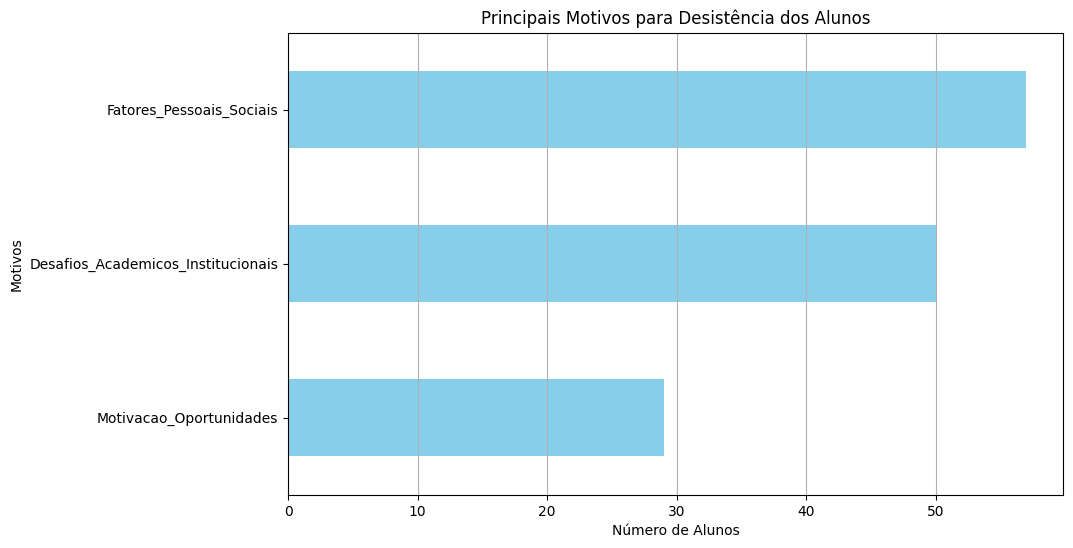

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = bd_si
df = pd.read_csv(url)

# Contar as ocorrências de cada motivo de desistência
motivos = ['Desafios_Academicos_Institucionais', 'Motivacao_Oportunidades',
           'Fatores_Pessoais_Sociais']

motivos_count = df[motivos].sum()

# Visualizar em um gráfico de barras
plt.figure(figsize=(10, 6))
motivos_count.sort_values().plot(kind='bar', color='skyblue')
plt.title('Principais Motivos para Desistência dos Alunos')
plt.xlabel('Número de Alunos')
plt.ylabel('Motivos')
plt.grid(axis='x')
plt.show()

**Em que período do curso é mais comum os alunos considerarem desistir?**


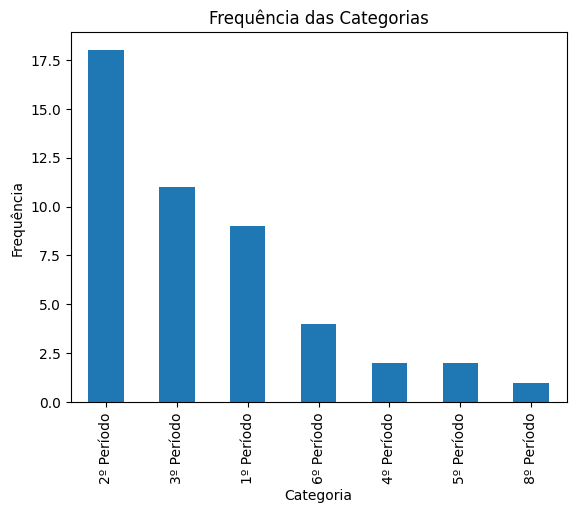

In [ ]:

periodo = df['Periodo_Intencao'].value_counts()

# Gerando o gráfico de barras
periodo.plot(kind='bar')

# Adicionando título e rótulos
plt.title('Frequência das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

**Quantos alunos ativos já pensaram ou pensam em desistir do curso?**


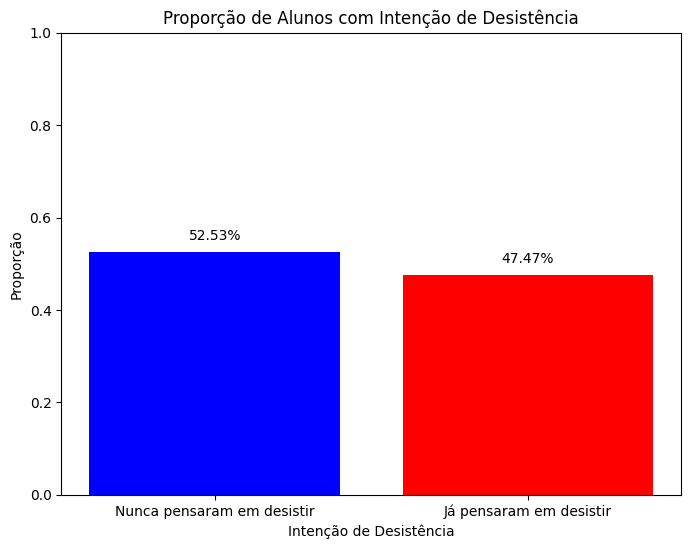

In [ ]:

# Calcular a proporção de alunos com intenção de desistência entre os ativos
prop_desistencia_ativos = df['Intencao'].value_counts(normalize=True).get('Não', 0)

# Calcular a proporção total de alunos com intenção de desistência
prop_desistencia_total = df['Intencao'].value_counts(normalize=True).get('Sim', 0)

# Dados para o gráfico
categorias = ['Nunca pensaram em desistir', 'Já pensaram em desistir']
proporcoes = [prop_desistencia_ativos, prop_desistencia_total]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, proporcoes, color=['blue', 'red'])
plt.xlabel('Intenção de Desistência')
plt.ylabel('Proporção')
plt.title('Proporção de Alunos com Intenção de Desistência')
plt.ylim(0, 1)

# Adicionar rótulos de porcentagem acima das barras
for i, v in enumerate(proporcoes):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom')

# Exibir o gráfico
plt.show()


**Quantos alunos ativos pensam em desistir do curso esse ano?**


In [ ]:
# Filtrando os alunos que têm intenção de desistir em 2024
alunos_desistentes_2024 = df[(df['Ano_Intencao'] == 2024) & (df['Intencao'] == 'Sim')]

# Contando a quantidade de alunos desistentes em 2024
quantidade_desistentes_2024 = len(alunos_desistentes_2024)

print(f'Quantidade de alunos que têm intenção de desistir em 2024: {quantidade_desistentes_2024}')

Quantidade de alunos que têm intenção de desistir em 2024: 11


Distribuição da desistencia dos alunos de SI


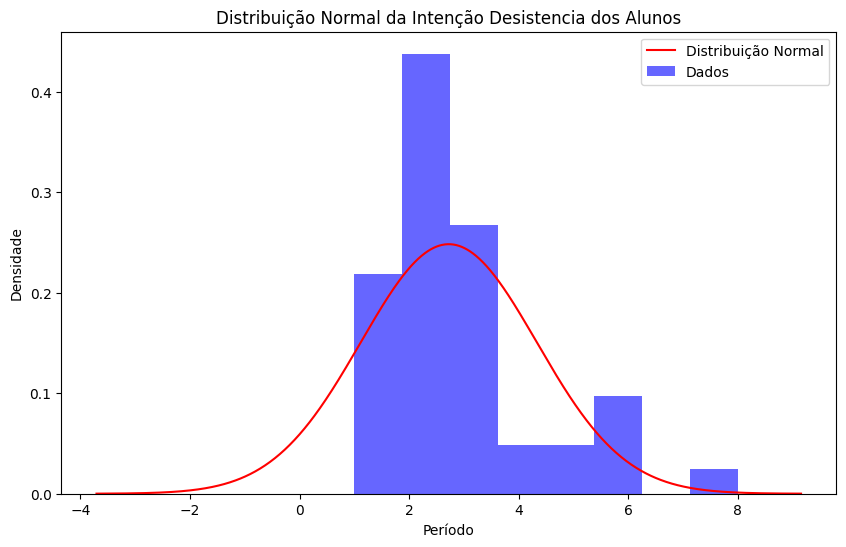

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dados dos períodos e número de alunos
periodos = np.array([1, 2, 3, 4, 5, 6, 7, 8])
num_alunos = np.array([9, 18, 11, 2, 2, 4, 0, 1])

# Calcular a média ponderada
media_ponderada = np.average(periodos, weights=num_alunos)

# Calcular o desvio padrão ponderado
variancia_ponderada = np.average((periodos - media_ponderada)**2, weights=num_alunos)
desvio_padrao_ponderado = np.sqrt(variancia_ponderada)

# Gerar valores para a distribuição normal
x = np.linspace(media_ponderada - 4*desvio_padrao_ponderado, media_ponderada + 4*desvio_padrao_ponderado, 1000)
y = norm.pdf(x, media_ponderada, desvio_padrao_ponderado)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal', color='red')
plt.hist(periodos, weights=num_alunos, bins=8, density=True, alpha=0.6, color='blue', label='Dados')

plt.xlabel('Período')
plt.ylabel('Densidade')
plt.title('Distribuição Normal da Intenção Desistencia dos Alunos')
plt.legend()
plt.show()
